# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('Resources/credit_y_n_set2.csv')
df = pd.read_csv(file_path)
df.head()

,member_id,loan,loan_amount,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,70694,5000,500000,5000,350.0,36 months,BAT5869156,11.54,C,C5,...,NaN,NaN,INDIVIDUAL,NaN,35th week,0,NaN,NaN,NaN,0
1,92502,5000,500000,5000,250.0,36 months,NaN,7.43,A,A2,...,NaN,NaN,INDIVIDUAL,NaN,157th week,0,NaN,NaN,NaN,1
2,95191,20000,2000000,20000,700.0,36 months,NaN,15.01,F,F1,...,NaN,NaN,INDIVIDUAL,NaN,48th week,0,NaN,NaN,NaN,0
3,110482,3500,350000,3500,2575.0,36 months,,12.17,D,D2,...,NaN,NaN,INDIVIDUAL,NaN,157th week,0,NaN,NaN,NaN,1
4,118364,16225,1622500,16225,475.0,36 months,BAT4347689,17.86,G,G5,...,NaN,NaN,INDIVIDUAL,NaN,157th week,1,NaN,NaN,NaN,1


## Convert result string to indicator

In [4]:
# Cleaning 

df.isnull().sum()

member_id                         0
loan                              0
loan_amount                       0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                  388
int_rate                          0
grade                             0
sub_grade                         0
emp_title                       147
emp_length                       58
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
desc                            771
purpose                           0
title                             2
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq         1498
mths_since_last_record         2175
open_acc                          0
pub_rec                     

<AxesSubplot:>

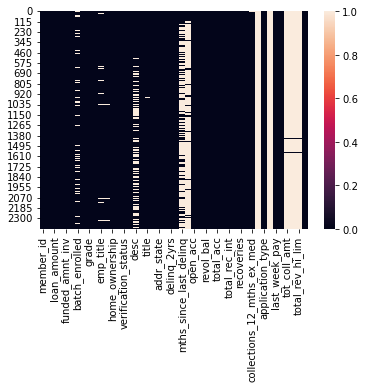

In [5]:
sns.heatmap(df.isnull())

In [6]:
df_clean = df.copy()

In [7]:
null_columns = ['batch_enrolled','emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq','mths_since_last_record', 'revol_util',
                'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df_clean.drop(null_columns, inplace=True, axis=1)

In [8]:
df_clean

,member_id,loan,loan_amount,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,home_ownership,...,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,last_week_pay,acc_now_delinq,loan_status
0,70694,5000,500000,5000,350.0,36 months,11.54,C,C5,MORTGAGE,...,13,f,352.34,0.0,182.27,1.84,INDIVIDUAL,35th week,0,0
1,92502,5000,500000,5000,250.0,36 months,7.43,A,A2,OWN,...,19,f,593.54,0.0,0.00,0.00,INDIVIDUAL,157th week,0,1
2,95191,20000,2000000,20000,700.0,36 months,15.01,F,F1,OWN,...,6,f,2435.47,0.0,667.24,6.68,INDIVIDUAL,48th week,0,0
3,110482,3500,350000,3500,2575.0,36 months,12.17,D,D2,RENT,...,4,f,695.03,0.0,0.00,0.00,INDIVIDUAL,157th week,0,1
4,118364,16225,1622500,16225,475.0,36 months,17.86,G,G5,MORTGAGE,...,20,f,4848.88,0.0,0.00,0.00,INDIVIDUAL,157th week,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1046542,18000,1800000,18000,18000.0,60 months,15.99,D,D2,RENT,...,29,f,8029.91,0.0,0.00,0.00,INDIVIDUAL,226th week,0,0
2410,1046606,25000,2500000,25000,24700.0,60 months,15.99,D,D2,RENT,...,11,f,11227.04,0.0,0.00,0.00,INDIVIDUAL,231th week,0,0
2411,1046615,8400,840000,8400,8400.0,36 months,11.49,B,B4,RENT,...,11,f,1565.02,0.0,0.00,0.00,INDIVIDUAL,157th week,0,1
2412,1047025,4000,400000,4000,4000.0,36 months,5.99,A,A2,RENT,...,18,f,95.45,0.0,0.00,0.00,INDIVIDUAL,22th week,0,1


In [9]:
## getting numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df_clean.select_dtypes(include=numerics).columns
num
df_clean[num].head(3)

,member_id,loan,loan_amount,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,acc_now_delinq,loan_status
0,70694,5000,500000,5000,350.0,11.54,55000.0,10.00,0,4,6,0,2447,13,352.34,0.0,182.27,1.84,0,0
1,92502,5000,500000,5000,250.0,7.43,85000.0,0.31,0,0,7,0,216,19,593.54,0.0,0.00,0.00,0,1
2,95191,20000,2000000,20000,700.0,15.01,80000.0,3.11,1,6,5,0,7883,6,2435.47,0.0,667.24,6.68,0,0


In [10]:
## getting categorical columns
cat = df_clean.drop(num,axis=1)
cat = cat.columns
df_clean[cat].head(3)

,term,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,last_week_pay
0,36 months,C,C5,MORTGAGE,Not Verified,n,other,287xx,NC,f,INDIVIDUAL,35th week
1,36 months,A,A2,OWN,Not Verified,n,credit_card,537xx,WI,f,INDIVIDUAL,157th week
2,36 months,F,F1,OWN,Not Verified,n,credit_card,333xx,FL,f,INDIVIDUAL,48th week


In [11]:
df_clean.corr()

,member_id,loan,loan_amount,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,acc_now_delinq,loan_status
member_id,1.000000,0.110424,0.110424,0.110821,0.280674,0.014004,0.013144,0.068410,-0.023942,-0.209187,0.034204,-0.033624,-0.055076,0.061665,0.159336,-0.094982,0.017169,-0.013945,-0.056849,-0.074892
loan,0.110424,1.000000,1.000000,0.980086,0.913507,0.271344,0.311589,0.072588,-0.014643,-0.041757,0.183522,-0.018902,0.260171,0.252244,0.698536,0.032027,0.115409,0.066524,0.015880,-0.126921
loan_amount,0.110424,1.000000,1.000000,0.980086,0.913507,0.271344,0.311589,0.072588,-0.014643,-0.041757,0.183522,-0.018902,0.260171,0.252244,0.698536,0.032027,0.115409,0.066524,0.015880,-0.126921
funded_amnt,0.110821,0.980086,0.980086,1.000000,0.931654,0.275857,0.312008,0.071150,-0.013592,-0.040907,0.174512,-0.021536,0.255548,0.236645,0.700894,0.036484,0.118513,0.069710,0.017406,-0.122783
funded_amnt_inv,0.280674,0.913507,0.913507,0.931654,1.000000,0.263033,0.295785,0.077637,-0.027579,-0.087884,0.155806,-0.029232,0.207110,0.226952,0.684940,-0.007902,0.092350,0.047204,-0.028659,-0.092950
int_rate,0.014004,0.271344,0.271344,0.275857,0.263033,1.000000,0.068087,0.106725,0.170373,0.179780,0.016725,0.122628,0.054111,-0.040625,0.511407,0.067418,0.111547,0.057986,0.032420,-0.228974
annual_inc,0.013144,0.311589,0.311589,0.312008,0.295785,0.068087,1.000000,-0.151943,0.006511,0.009654,0.187541,-0.004419,0.280483,0.267173,0.226891,0.004370,0.001940,-0.004222,0.016351,0.022438
dti,0.068410,0.072588,0.072588,0.071150,0.077637,0.106725,-0.151943,1.000000,-0.010906,-0.001984,0.292671,-0.001355,0.184564,0.228875,0.094713,-0.021718,-0.005662,-0.018023,0.001674,-0.046470
delinq_2yrs,-0.023942,-0.014643,-0.014643,-0.013592,-0.027579,0.170373,0.006511,-0.010906,1.000000,-0.003876,0.017354,0.005944,-0.045800,0.054701,0.031463,0.065780,0.031310,0.022787,0.034098,-0.006626
inq_last_6mths,-0.209187,-0.041757,-0.041757,-0.040907,-0.087884,0.179780,0.009654,-0.001984,-0.003876,1.000000,0.087251,0.076561,-0.000484,0.068498,-0.032920,0.036885,0.062572,0.053205,-0.014460,-0.075137


<AxesSubplot:>

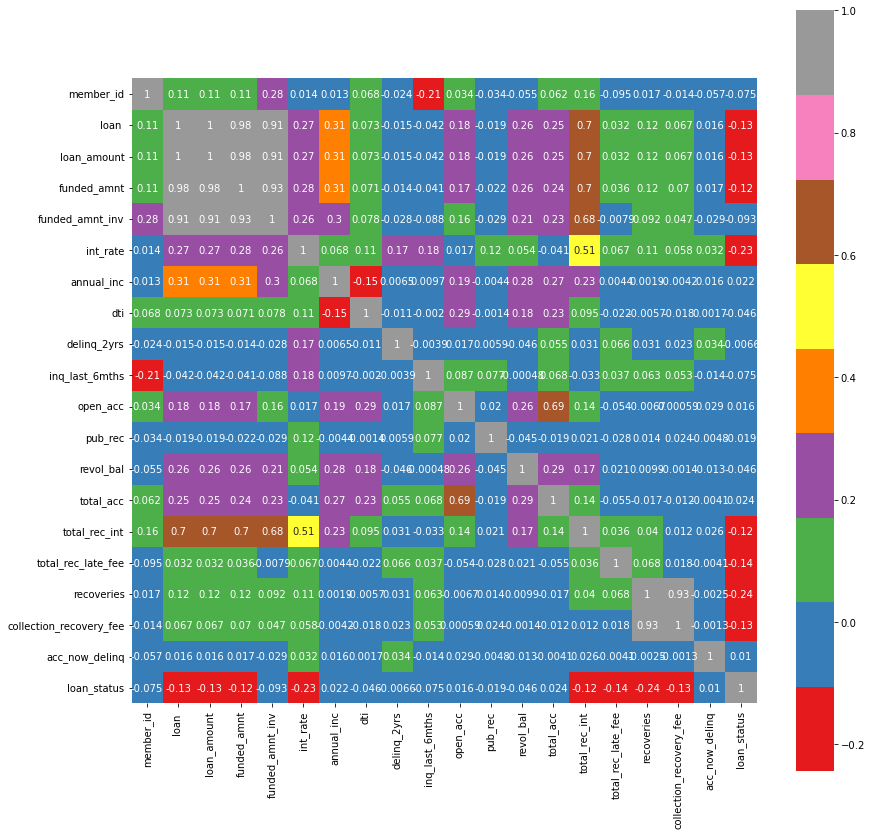

In [12]:
plt.figure(figsize=(14,14))
sns.heatmap(df[num].corr(),annot=True,square=True,cmap='Set1')

In [13]:
df_clean[num].isnull().sum()

member_id                  0
loan                       0
loan_amount                0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
annual_inc                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
acc_now_delinq             0
loan_status                0
dtype: int64

In [14]:
## Testing code

In [15]:
# Create our features
X = pd.get_dummies(df_clean.drop('loan_status', axis = 1))

# Create our target 
y = df['loan_status']

# Split the Data into Training and Testing

In [16]:
# Check the balance of our target values
y.value_counts()

1    1942
0     472
Name: loan_status, dtype: int64

In [17]:
X.describe()

,member_id,loan,loan_amount,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_week_pay_82th week,last_week_pay_83th week,last_week_pay_87th week,last_week_pay_8th week,last_week_pay_91th week,last_week_pay_92th week,last_week_pay_95th week,last_week_pay_96th week,last_week_pay_9th week,last_week_pay_NAth week
count,2.414000e+03,2414.000000,2.414000e+03,2414.000000,2414.000000,2414.000000,2.414000e+03,2414.000000,2414.000000,2414.000000,...,2414.000000,2414.000000,2414.00000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,7.216943e+05,10839.819801,1.083982e+06,10554.370340,9759.480316,12.159006,7.014700e+04,13.541848,0.149959,1.215824,...,0.002900,0.010356,0.01657,0.001657,0.013256,0.004143,0.001243,0.017813,0.007457,0.003314
std,2.160963e+05,6904.956843,6.904957e+05,6633.602451,6596.425524,3.580595,6.208022e+04,6.666828,0.507595,1.712023,...,0.053782,0.101258,0.12768,0.040681,0.114393,0.064242,0.035238,0.132298,0.086046,0.057484
min,7.069400e+04,500.000000,5.000000e+04,500.000000,0.000000,5.320000,6.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.928735e+05,5500.000000,5.500000e+05,5425.000000,4875.000000,9.630000,4.145900e+04,8.512500,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.513805e+05,9600.000000,9.600000e+05,9500.000000,8375.000000,12.065000,5.800000e+04,13.625000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.003872e+05,15000.000000,1.500000e+06,14856.250000,13800.000000,14.720000,8.285500e+04,18.760000,0.000000,2.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.047261e+06,35000.000000,3.500000e+06,35000.000000,35000.000000,25.570000,1.362000e+06,39.540000,10.000000,28.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Check the balance of our target values
y.value_counts()

1    1942
0     472
Name: loan_status, dtype: int64

In [19]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   random_state=1, 
                                                   stratify=y)
X_train.shape

(1810, 758)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [20]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [21]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [23]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(solver='lbfgs', random_state=1)
slr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [25]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score


In [26]:
y_pred_slr = slr.predict(X_test_scaled)

In [27]:
bas_slr=balanced_accuracy_score(y_test, y_pred_slr)
print('Easy Ensemble Classifier Balance Accuracy Score: ', bas_slr)
print('AUC-ROC Score :',roc_auc_score(y_test, y_pred_slr))

Easy Ensemble Classifier Balance Accuracy Score:  0.656084656084656
AUC-ROC Score : 0.656084656084656


In [28]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_slr)
cm_df = pd.DataFrame(
    cm, 
    index=["Actual Approve", "Actual Deny"],
    columns=["Predicted Approve", "Predicted Deny"]
)
cm_df

,Predicted Approve,Predicted Deny
Actual Approve,59,130
Actual Deny,0,536


In [29]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_slr))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.31      1.00      0.48      0.56      0.29       189
          1       0.80      1.00      0.31      0.89      0.56      0.33       536

avg / total       0.86      0.82      0.49      0.78      0.56      0.32       725



In [30]:
print('Cross Validation:',cross_val_score(slr, X_test_scaled, y_pred_slr, cv=5).mean())
# The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
# It is also used to flag problems like overfitting or selection bias and gives insights on how the model will
# generalize to an independent dataset.

Cross Validation: 0.8993103448275862


In [31]:
slr_val = pd.Series(y_test).value_counts()
slr_valpred = pd.Series(y_pred_slr).value_counts()
slr_x1 = slr_val[1]
slr_x2 = slr_val[0]
slr_x3 = slr_valpred[1]
slr_x4 = slr_valpred[0]

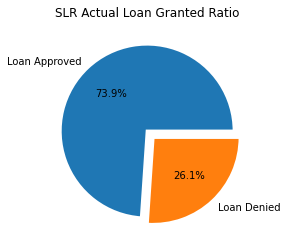

In [32]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([slr_x1, slr_x2], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SLR Actual Loan Granted Ratio')
#plt.savefig('SLR_pie_actu.png')
plt.show()

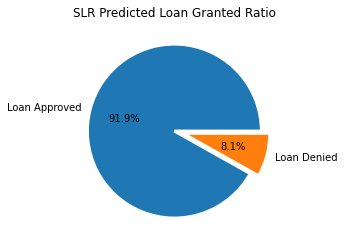

In [33]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([slr_x3, slr_x4], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SLR Predicted Loan Granted Ratio')
plt.savefig('SLR_pie_pred.png')
plt.show()

# Oversampling
Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [34]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled_nro, y_resampled_nro = ros.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled_nro)

Counter({0: 1406, 1: 1406})

In [35]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model_nro = LogisticRegression(solver='lbfgs', random_state=1)
model_nro.fit(X_resampled_nro, y_resampled_nro)

LogisticRegression(random_state=1)

In [36]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

In [37]:
y_pred_nro = model_nro.predict(X_test_scaled)

In [38]:
bas_nro=balanced_accuracy_score(y_test, y_pred_nro)
print('Easy Ensemble Classifier Balance Accuracy Score: ', bas_nro)
print('AUC-ROC Score :',roc_auc_score(y_test, y_pred_nro))

Easy Ensemble Classifier Balance Accuracy Score:  0.6676735370765221
AUC-ROC Score : 0.6676735370765221


In [39]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm_ros = confusion_matrix(y_test, y_pred_nro)
cm_df_ros = pd.DataFrame(
    cm_ros,
    index=["Actual Approve", "Actual Deny"],
    columns=["Predicted Approve", "Predicted Deny"]
)
cm_df_ros

,Predicted Approve,Predicted Deny
Actual Approve,93,96
Actual Deny,84,452


In [40]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred_nro))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.49      0.84      0.51      0.64      0.40       189
          1       0.82      0.84      0.49      0.83      0.64      0.43       536

avg / total       0.75      0.75      0.58      0.75      0.64      0.42       725



In [41]:
print('Cross Validation:',cross_val_score(model_nro, X_test_scaled, y_pred_nro, cv=5).mean())
# The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
# It is also used to flag problems like overfitting or selection bias and gives insights on how the model will
# generalize to an independent dataset.

Cross Validation: 0.8289655172413793


In [42]:
nro_val = pd.Series(y_test).value_counts()
nro_valpred = pd.Series(y_pred_nro).value_counts()
nro_x1 = nro_val[1]
nro_x2 = nro_val[0]
nro_x3 = nro_valpred[1]
nro_x4 = nro_valpred[0]

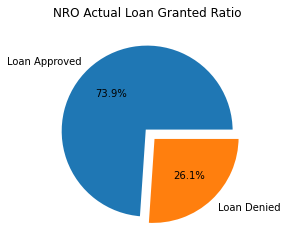

In [43]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([nro_x1, nro_x2], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('NRO Actual Loan Granted Ratio')
#plt.savefig('NRO_pie_actu.png')
plt.show()

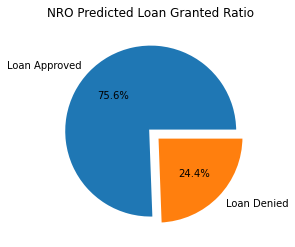

In [44]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([nro_x3, nro_x4], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('NRO Predicted Loan Granted Ratio')
plt.savefig('NRO_pie_pred.png')
plt.show()

### SMOTE Oversampling

In [45]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled_smote, y_resampled_smote = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train_scaled, y_train
)
from collections import Counter

Counter(y_resampled_smote)

Counter({0: 1406, 1: 1406})

In [46]:
# Train the Logistic Regression model using the resampled data
model_smote = LogisticRegression(solver='lbfgs', random_state=1)
model_smote.fit(X_resampled_smote, y_resampled_smote)

LogisticRegression(random_state=1)

In [47]:
y_pred_smote = model_smote.predict(X_test_scaled)

In [48]:
# Calculated the balanced accuracy score
bas_smote=balanced_accuracy_score(y_test, y_pred_smote)
print('Easy Ensemble Classifier Balance Accuracy Score: ', bas_smote)
print('AUC-ROC Score :',roc_auc_score(y_test, y_pred_smote))

Easy Ensemble Classifier Balance Accuracy Score:  0.6497818447445314
AUC-ROC Score : 0.6497818447445314


In [49]:
# Display the confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
cm_df_smote = pd.DataFrame(
    cm_smote,
    index=["Actual Approve", "Actual Deny"],
    columns=["Predicted Approve", "Predicted Deny"]
)
cm_df_smote 

,Predicted Approve,Predicted Deny
Actual Approve,88,101
Actual Deny,89,447


In [50]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_smote))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.47      0.83      0.48      0.62      0.37       189
          1       0.82      0.83      0.47      0.82      0.62      0.40       536

avg / total       0.73      0.74      0.56      0.74      0.62      0.40       725



In [51]:
print('Cross Validation:',cross_val_score(model_smote, X_test_scaled, y_pred_smote, cv=5).mean())
# The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
# It is also used to flag problems like overfitting or selection bias and gives insights on how the model will
# generalize to an independent dataset.

Cross Validation: 0.8606896551724137


In [52]:
smote_val = pd.Series(y_test).value_counts()
smote_valpred = pd.Series(y_pred_smote).value_counts()
smote_x1 = smote_val[1]
smote_x2 = smote_val[0]
smote_x3 = smote_valpred[1]
smote_x4 = smote_valpred[0]

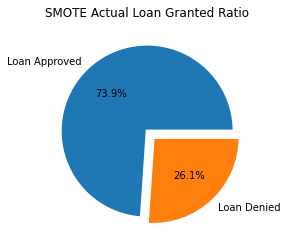

In [53]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([nro_x1, nro_x2], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SMOTE Actual Loan Granted Ratio')
#plt.savefig('SMOTE_pie_actu.png')
plt.show()

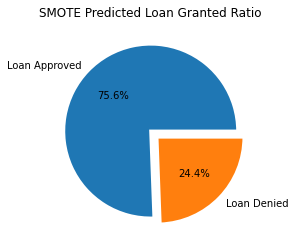

In [54]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([nro_x3, nro_x4], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SMOTE Predicted Loan Granted Ratio')
plt.savefig('SMOTE_pie_pred.png')
plt.show()

# Cluster Centroids Undersampling

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [55]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=1)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train_scaled, y_train)


# View the count of target classes with Counter
from collections import Counter

Counter(y_resampled_cc)

Counter({0: 283, 1: 283})

In [56]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model_cc = LogisticRegression(solver='lbfgs', random_state=1)
model_cc.fit(X_resampled_cc, y_resampled_cc)

LogisticRegression(random_state=1)

In [57]:
from sklearn.metrics import balanced_accuracy_score

In [58]:
y_pred_cc = model_cc.predict(X_test_scaled)

In [59]:
# Calculate the balanced accuracy score
bas_cc=balanced_accuracy_score(y_test, y_pred_cc)
print('Easy Ensemble Classifier Balance Accuracy Score: ', bas_cc)
print('AUC-ROC Score :',roc_auc_score(y_test, y_pred_cc))

Easy Ensemble Classifier Balance Accuracy Score:  0.6870015004343363
AUC-ROC Score : 0.6870015004343364


In [60]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm_cc = confusion_matrix(y_test, y_pred_cc)
cm_df_cc = pd.DataFrame(
    cm_cc,
    index=["Actual Approve", "Actual Deny"],
    columns=["Predicted Approve", "Predicted Deny"]
)
cm_df_cc

,Predicted Approve,Predicted Deny
Actual Approve,113,76
Actual Deny,120,416


In [61]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_cc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.48      0.60      0.78      0.54      0.68      0.46       189
          1       0.85      0.78      0.60      0.81      0.68      0.47       536

avg / total       0.75      0.73      0.64      0.74      0.68      0.47       725



In [62]:
print('Cross Validation:',cross_val_score(model_cc, X_test_scaled, y_pred_cc, cv=5).mean())
# The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
# It is also used to flag problems like overfitting or selection bias and gives insights on how the model will
# generalize to an independent dataset.

Cross Validation: 0.8455172413793104


In [63]:
cc_val = pd.Series(y_test).value_counts()
cc_valpred = pd.Series(y_pred_cc).value_counts()
cc_x1 = cc_val[1]
cc_x2 = cc_val[0]
cc_x3 = cc_valpred[1]
cc_x4 = cc_valpred[0]

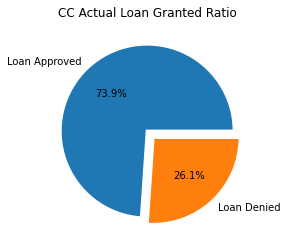

In [64]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([cc_x1, cc_x2], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('CC Actual Loan Granted Ratio')
#plt.savefig('CC_pie_actu.png')
plt.show()

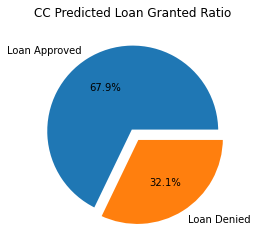

In [65]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([cc_x3, cc_x4], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('CC Predicted Loan Granted Ratio')
plt.savefig('CC_pie_pred.png')
plt.show()

# Combination (Over and Under) Sampling

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [66]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled_se, y_resampled_se= smote_enn.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
Counter(y_resampled_se)

Counter({0: 1272, 1: 764})

In [67]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model_se = LogisticRegression(solver='lbfgs', random_state=1)
model_se.fit(X_resampled_se, y_resampled_se)

LogisticRegression(random_state=1)

In [68]:
from sklearn.metrics import balanced_accuracy_score

In [69]:
y_pred_se = model_se.predict(X_test_scaled)

In [70]:
# Calculate the balanced accuracy score
bas_se=balanced_accuracy_score(y_test, y_pred_se)
print('Easy Ensemble Classifier Balance Accuracy Score: ', bas_se)
print('AUC-ROC Score :',roc_auc_score(y_test, y_pred_se))

Easy Ensemble Classifier Balance Accuracy Score:  0.6624121456211008
AUC-ROC Score : 0.6624121456211008


In [71]:
# Display the confusion matrix
cm_se = confusion_matrix(y_test, y_pred_se)
cm_df_se = pd.DataFrame(
    cm_se,
    index=["Actual Approve", "Actual Deny"],
    columns=["Predicted Approve", "Predicted Deny"]
)
cm_df_se

,Predicted Approve,Predicted Deny
Actual Approve,103,86
Actual Deny,118,418


In [72]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_se))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.47      0.54      0.78      0.50      0.65      0.42       189
          1       0.83      0.78      0.54      0.80      0.65      0.43       536

avg / total       0.73      0.72      0.61      0.73      0.65      0.43       725



In [73]:
print('Cross Validation:',cross_val_score(model_se, X_test_scaled, y_pred_se, cv=5).mean())
# The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
# It is also used to flag problems like overfitting or selection bias and gives insights on how the model will
# generalize to an independent dataset.

Cross Validation: 0.8524137931034483


In [74]:
se_val = pd.Series(y_test).value_counts()
se_valpred = pd.Series(y_pred_se).value_counts()
se_x1 = se_val[1]
se_x2 = se_val[0]
se_x3 = se_valpred[1]
se_x4 = se_valpred[0]

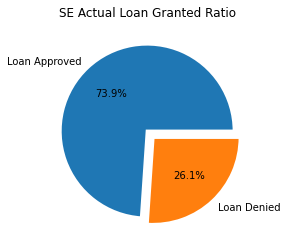

In [75]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([se_x1, se_x2], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SE Actual Loan Granted Ratio')
#plt.savefig('SE_pie_actu.png')
plt.show()

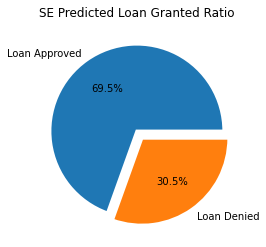

In [76]:
# Pie Plot of Actual Loan Approved
explode = (0, 0.1)
labels = ['Loan Approved', 'Loan Denied']

plt.pie([se_x3, se_x4], explode=explode, startangle=0, labels=labels, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'medium'}, radius=1)
plt.title('SE Predicted Loan Granted Ratio')
plt.savefig('SE_pie_pred.png')
plt.show()

In [77]:
print(f"Original data set's balanced accuracy score = {bas_slr}")
print(f"-------------------------------------------------------------------")
print(f"Naive oversampling balanced accuracy score = {bas_nro} ")
print(f"SMOTE (oversampling) balanced accuracy score = {bas_smote} ")
print(f"Cluster Centroids (undersampling) balanced accuracy score = {bas_cc} ")
print(f"SMOTEENN (over-under sampling combo) balanced accuracy score = {bas_se} ")

Original data set's balanced accuracy score = 0.656084656084656
-------------------------------------------------------------------
Naive oversampling balanced accuracy score = 0.6676735370765221 
SMOTE (oversampling) balanced accuracy score = 0.6497818447445314 
Cluster Centroids (undersampling) balanced accuracy score = 0.6870015004343363 
SMOTEENN (over-under sampling combo) balanced accuracy score = 0.6624121456211008 


# Interesting Insights

1. Which model had the best balanced accuracy score?

##### Cluster Centroids (undersampling) has best Balanced Accuracy Scores of: 0.6870015004343363 .

2. Which model had the best recall score?

##### Simple Linear Regression had the best overall Recall score of: Deny: 0.31, Approve: 1.00, Total: 0.82

3. Which model had the best geometric mean score?

##### Cluster Centroids (undersampling) had the greatest Geometric Mean scores of: Deny: 0.68, Approve: 0.68, Total: 0.68
